In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import fetch_openml

In [12]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from lls import LLS

In [13]:
boston = fetch_openml(name="boston", version=1, as_frame=True)

In [14]:
data = boston.data
data['Price'] = boston.target

In [15]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
X = data[["RM", "ZN"]].values
y = np.array(data["Price"]) 

In [17]:
X_train = np.c_[np.ones(X.shape[0]), X]

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [19]:
lls = LLS()
lls.fit(X_train,y_train)

In [20]:
w = lls.w
w

array([3.46410915, 0.10273716])

In [21]:
y_pred = lls.predict(X_train)

In [22]:
X1, X2 = X_train[:,0], X_train[:,1]
x1, x2 = np.meshgrid(X1, X2)
y_pred1, y_pred2 = w[0] * x1, w[1] * x2

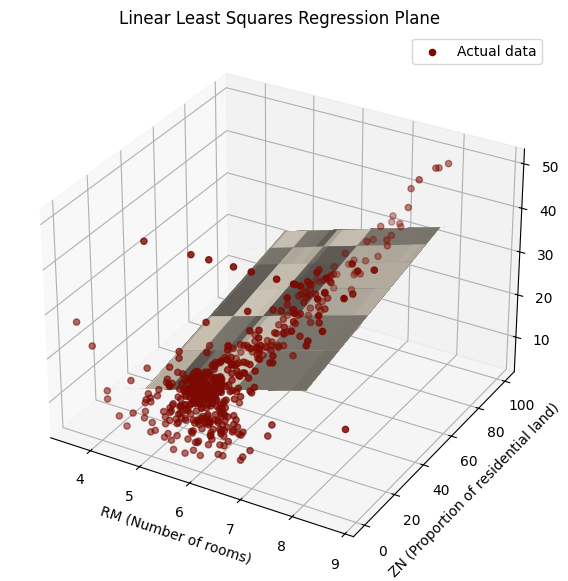

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, color='#7c0a02', label='Actual data')
ax.plot_surface(x1, x2,  y_pred1 + y_pred2, color='#e3dac9', alpha=0.7)

ax.set_xlabel('RM (Number of rooms)')
ax.set_ylabel('ZN (Proportion of residential land)')
ax.set_zlabel('Price')
ax.set_title('Linear Least Squares Regression Plane')

plt.legend()
plt.show()